In [1]:
pip install pywavelets

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import mne
import seaborn as sns

In [2]:
raw = mne.io.read_raw_edf('D:\CHB_MIT\chb01_03.edf', preload=True)
raw

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ACER\AppData\Local\Temp\ipykernel_4092\2637501130.py:1: SyntaxWarning: invalid escape sequence '\C'
  raw = mne.io.read_raw_edf('D:\CHB_MIT\chb01_03.edf', preload=True)


Extracting EDF parameters from D:\CHB_MIT\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\ACER\AppData\Local\Temp\ipykernel_4092\2637501130.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('D:\CHB_MIT\chb01_03.edf', preload=True)


Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [3]:
raw.info

Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [4]:
# List of channels with some inconsistencies
channels = [
    'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1',
    'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
    'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2',
    'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
    'FZ-CZ', 'CZ-PZ', 'T7-FT9',
    'FT9-FT10', 'FT10-T8',
]


# Select only the unique, standardized channels
raw.pick_channels(channels)
# Rename 'T8-P8-0' to 'T8-P8'
channel_mapping = {'T8-P8-0': 'T8-P8'}
mne.rename_channels(raw.info, channel_mapping)

# Apply a bandpass filter (0.5 to 70 Hz)
raw.filter(l_freq=0.5, h_freq=100.0)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [5]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [6]:
seizure_start_time = 2996  # in seconds
seizure_end_time = 3036  # in seconds


# Convert seizure times to onset and duration (in seconds)
onset = seizure_start_time  # onset time in seconds
duration = seizure_end_time - seizure_start_time  # duration in seconds

In [7]:
# Create an annotation object
annotations = mne.Annotations(onset=[onset], duration=[duration], description=['seizure'])

# Set the annotations to the raw data
raw.set_annotations(annotations)
raw.plot()

Using qt as 2D backend.


In [8]:
raw.filter(0.5, 100)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


Channels marked as bad:
none


In [9]:
# Applying a notch filter at 60 Hz
raw.notch_filter(freqs=60, method = 'fir', fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\ACER\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


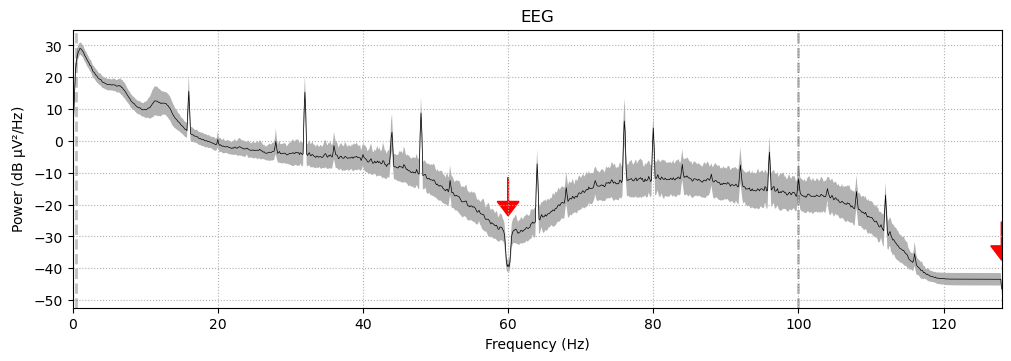

In [10]:
def add_arrows(axes):
    """Add some arrows at 60 Hz and its harmonics."""
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 128):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )

fig = raw.compute_psd(fmax=128).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
add_arrows(fig.axes[:2])

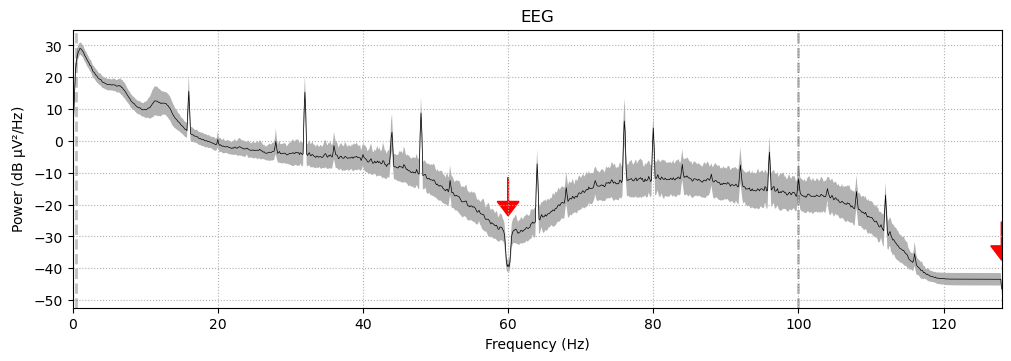

In [11]:
fig

In [12]:
raw_notch_fit = raw.copy().notch_filter(
    freqs=256, picks='all', method="spectrum_fit", filter_length="10s"
)
for title, data in zip(["Un", "spectrum_fit "], [raw, raw_notch_fit]):
    fig = data.compute_psd(fmax=128).plot(
        average=True, amplitude=False, picks="data", exclude="bads"
    )
    fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
    add_arrows(fig.axes[:2])

Filtering raw data in 1 contiguous segment
Removed notch frequencies (Hz):
    128.00 : 15099 windows
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)


C:\Users\ACER\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).


C:\Users\ACER\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


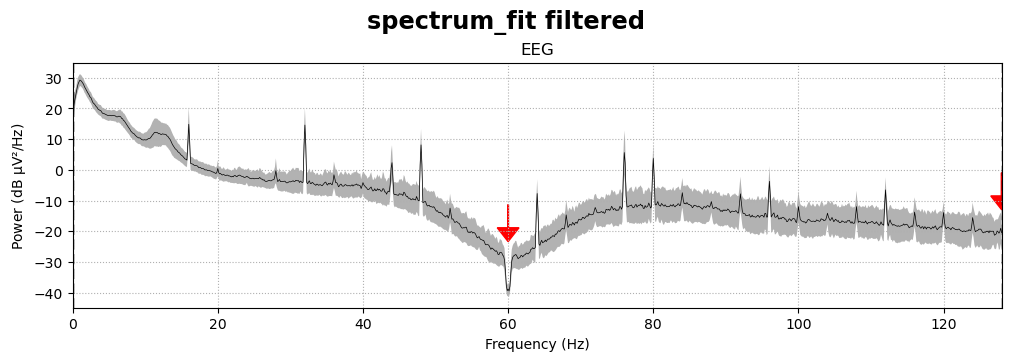

In [25]:
fig

In [13]:
raw.resample(256, npad="auto")

Sampling frequency of the instance is already 256.0, returning unmodified.


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [14]:
raw.set_eeg_reference('average', projection=True)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [15]:
# Apply the projection
raw.apply_proj()

Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [29]:
raw.info['projs']

[<Projection | Average EEG reference, active : False, n_channels : 23>]

In [31]:
raw.plot()

Channels marked as bad:
none


In [23]:
%%capture
!pip install pyedflib
!pip install PyWavelets

In [24]:
# Ensure all necessary libraries are installed
!pip install pyedflib numpy pandas matplotlib pillow scikit-learn PyWavelets

In [25]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import linear_model
import pywt
import matplotlib.patches as patches
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN



In [27]:
# Load the edf file
f = pyedflib.EdfReader("D:\CHB_MIT\chb01_03.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

# and load the data into a DataFrame
df_signals = pd.DataFrame(sigbufs)
df_signals = df_signals.transpose()
df_signals.columns = signal_labels

In [28]:
signal_labels

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8']

# Funcion buliding


In [ ]:
import pywt

def ChannelSelection(signal):
    try: 
        channels = [
            'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1',
            'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2',
            'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'T7-FT9',
            'FT9-FT10', 'FT10-T8',
            ]


        # Select only the unique, standardized channels
        signal.pick_channels(channels)
        # Rename 'T8-P8-0' to 'T8-P8'
        channel_mapping = {'T8-P8-0': 'T8-P8'}
        mne.rename_channels(signal.info, channel_mapping)
    except:
        print("Channel name are not same!!")



def DWT():
    # Example EEG data: Replace this with your actual data
    sampling_frequency = 256  # in Hz
    
    # Perform 5-level DWT using the Daubechies-4 wavelet
    wavelet = 'db4'
    coeffs = pywt.wavedec(data, wavelet, level=5)
    
    # coeffs[0] contains the approximation coefficients at the 5th level
    # coeffs[1] to coeffs[5] contain the detail coefficients at levels 5 to 1 respectively
    
    # For visualization, plot the approximation and detail coefficients
    plt.figure(figsize=(12, 8))
    for i in range(6):
        plt.subplot(6, 1, i+1)
        if i == 0:
            plt.plot(coeffs[i], label=f'Approximation Coefficients (Level 5)')
        else:
            plt.plot(coeffs[i], label=f'Detail Coefficients (Level {6-i})')
        plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
























def preprocessing(path):
    raw = mne.io.read_raw_edf(path, preload=True)
    # List of channels with some inconsistencies
    raw = ChannelSelection(raw)
    


    # Apply a bandpass filter (0.5 to 70 Hz)
    raw.filter(l_freq=0.5, h_freq=128)
    raw_notch = raw.copy().notch_filter(freqs=[60, 120], notch_widths=6)  # notch_widths defines the width of the notch

